In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
abstracts = pd.read_pickle('data/EPMC/eye_in_new_keywords_ABSTRACTS_LEMMA.pkl')
display(abstracts.head())

countvec = joblib.load('data/CountVec.joblib')
countvec

pmid
30209082    ass prevalence cause vision impairment north a...
29781739    developed country genetically inherited eye di...
30092731    systemic autoimmune disease associated ocular ...
30096011    ass prevalence ocular manifestation related di...
30270476    optical coherence tomography oct provides non ...
Name: abstractText, dtype: object

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.2, max_features=None, min_df=0.0005,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [3]:
pmids = abstracts.index
features = countvec.get_feature_names()

countvec_vectors = countvec.transform(abstracts)

del abstracts
del countvec

In [14]:
countvec_sample = countvec_vectors[:24000]

In [15]:
lda = LatentDirichletAllocation(learning_method='online',verbose=1)

n_components = np.arange(10,60,10)
parameters = {'n_components':n_components}

grid = GridSearchCV(lda, parameters, cv=3, verbose=1)

grid.fit(countvec_sample)

joblib.dump(grid.best_estimator_,'data/LDA_BestEstimator_GridSearch.joblib')

grid.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits
iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 35.1min finished


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

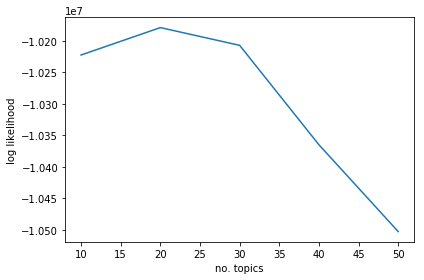

In [19]:
plt.plot(n_components,grid.cv_results_['mean_test_score'])
plt.xlabel('no. topics')
plt.ylabel('log likelihood')
plt.tight_layout()
plt.savefig('data/LDA_GridSearch.png')

['data/LDA_BestEstimator_GridSearch.joblib']